In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('adult.csv')

In [ ]:
data.shape

(48844, 17)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income,Unnamed: 16
0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
2,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,NaN,NaN
3,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,NaN,NaN
4,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48844 non-null  int64  
 1   workclass        48843 non-null  object 
 2   fnlwgt           48843 non-null  float64
 3   education        48843 non-null  object 
 4   educational-num  48843 non-null  float64
 5   marital-status   48843 non-null  object 
 6   occupation       48843 non-null  object 
 7   relationship     48843 non-null  object 
 8   race             48843 non-null  object 
 9   gender           48843 non-null  object 
 10  capital-gain     48843 non-null  float64
 11  capital-loss     48843 non-null  float64
 12  hours-per-week   48843 non-null  float64
 13  native-country   48843 non-null  object 
 14  income           48843 non-null  object 
 15  Income           48715 non-null  float64
 16  Unnamed: 16      0 non-null      float64
dtypes: float64(7

In [ ]:
data.rename(columns={"Income":"income_num"},inplace=True)

In [ ]:
import re
data.columns=[re.sub("-","_",x) for x in data.columns]

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'income_num', 'Unnamed: 16'],
      dtype='object')

In [ ]:
data.isnull().mean()*100

age                  0.000000
workclass            0.002047
fnlwgt               0.002047
education            0.002047
educational_num      0.002047
marital_status       0.002047
occupation           0.002047
relationship         0.002047
race                 0.002047
gender               0.002047
capital_gain         0.002047
capital_loss         0.002047
hours_per_week       0.002047
native_country       0.002047
income               0.002047
income_num           0.264106
Unnamed: 16        100.000000
dtype: float64

In [ ]:
data.drop('Unnamed: 16',axis=1,inplace=True)

In [ ]:
data.isnull().mean()*100

age                0.000000
workclass          0.002047
fnlwgt             0.002047
education          0.002047
educational_num    0.002047
marital_status     0.002047
occupation         0.002047
relationship       0.002047
race               0.002047
gender             0.002047
capital_gain       0.002047
capital_loss       0.002047
hours_per_week     0.002047
native_country     0.002047
income             0.002047
income_num         0.264106
dtype: float64

In [ ]:
data[data['fnlwgt'].isna()]

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_num
0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data[~data['fnlwgt'].isna()]

In [ ]:
data.isnull().mean()*100

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
educational_num    0.000000
marital_status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     0.000000
income             0.000000
income_num         0.262064
dtype: float64

In [ ]:
data['income_num']=np.where(data['income_num'].isna(),data['income_num'].median(),data['income_num'])

In [ ]:
data.isnull().mean()*100

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational_num    0.0
marital_status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital_gain       0.0
capital_loss       0.0
hours_per_week     0.0
native_country     0.0
income             0.0
income_num         0.0
dtype: float64

In [ ]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
data['occupation'].value_counts(normalize=True)

occupation
Prof-specialty       0.126364
Craft-repair         0.125136
Exec-managerial      0.124603
Adm-clerical         0.114878
Sales                0.112688
Other-service        0.100792
Machine-op-inspct    0.061892
?                    0.057511
Transport-moving     0.048216
Handlers-cleaners    0.042422
Farming-fishing      0.030506
Tech-support         0.029605
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: proportion, dtype: float64

In [ ]:
col=['occupation','relationship']
for i in col:
  print(i ,"\n")
  print(data[i].value_counts(normalize=True))

occupation 

occupation
Prof-specialty       0.126364
Craft-repair         0.125136
Exec-managerial      0.124603
Adm-clerical         0.114878
Sales                0.112688
Other-service        0.100792
Machine-op-inspct    0.061892
?                    0.057511
Transport-moving     0.048216
Handlers-cleaners    0.042422
Farming-fishing      0.030506
Tech-support         0.029605
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: proportion, dtype: float64
relationship 

relationship
Husband           0.403620
Not-in-family     0.257621
Own-child         0.155232
Unmarried         0.104928
Wife              0.047724
Other-relative    0.030833
Husbend           0.000041
Name: proportion, dtype: float64


In [ ]:
data['occupation']=np.where(data['occupation']=="?",data['occupation'].mode(),data['occupation'])

In [ ]:
data['occupation'].value_counts(normalize=True)

occupation
Prof-specialty       0.183875
Craft-repair         0.125136
Exec-managerial      0.124603
Adm-clerical         0.114878
Sales                0.112688
Other-service        0.100792
Machine-op-inspct    0.061892
Transport-moving     0.048216
Handlers-cleaners    0.042422
Farming-fishing      0.030506
Tech-support         0.029605
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: proportion, dtype: float64

In [ ]:
data['relationship']=np.where(data['relationship']=="Husbend",'Husband',data['relationship'])

In [ ]:
col=['occupation','relationship']
for i in col:
  print(i ,"\n")
  print(data[i].value_counts(normalize=True))

occupation 

occupation
Prof-specialty       0.183875
Craft-repair         0.125136
Exec-managerial      0.124603
Adm-clerical         0.114878
Sales                0.112688
Other-service        0.100792
Machine-op-inspct    0.061892
Transport-moving     0.048216
Handlers-cleaners    0.042422
Farming-fishing      0.030506
Tech-support         0.029605
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: proportion, dtype: float64
relationship 

relationship
Husband           0.403661
Not-in-family     0.257621
Own-child         0.155232
Unmarried         0.104928
Wife              0.047724
Other-relative    0.030833
Name: proportion, dtype: float64


In [ ]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income_num
count,48843.000000,4.884300e+04,48843.000000,48843.000000,48843.000000,48843.000000,48843.000000
mean,38.643306,1.896649e+05,10.078026,1079.045534,87.500522,40.422374,7027.926213
std,13.710509,1.056031e+05,2.570984,7451.944370,403.000621,12.391317,3309.307370
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,5000.000000
25%,28.000000,1.175520e+05,9.000000,0.000000,0.000000,40.000000,7000.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000,7000.000000
75%,48.000000,2.376380e+05,12.000000,0.000000,0.000000,45.000000,7000.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,500000.000000


In [ ]:
data[data['age']<=28].shape[0] ####1st quartile or 25th perc

13293

In [ ]:
13293/48843

0.27215772986917264

In [ ]:
#VK:50 50 50
#RP:0 50 100

In [ ]:
data[data['age']<=37].shape[0] ####2nd quartile or 50th perc or median

24975

In [ ]:
24975/48843

0.5113322277501382

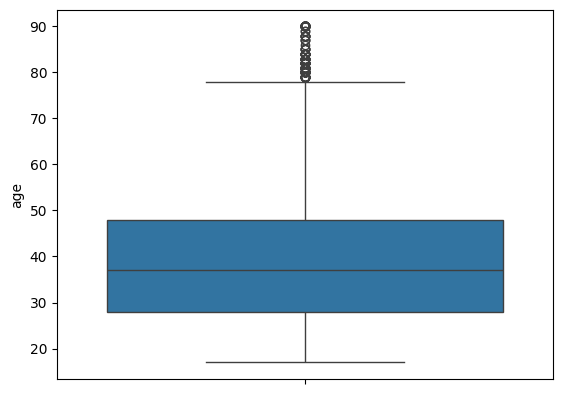

In [ ]:
sns.boxplot(data['age'])
plt.show()

In [ ]:
#IQR=Q3-Q1=20
#UW=Q3+1.5*IQR
#LW=Q1-1.5*IQR

In [ ]:
data['age']=np.where(data['age']>78,78,data['age'])

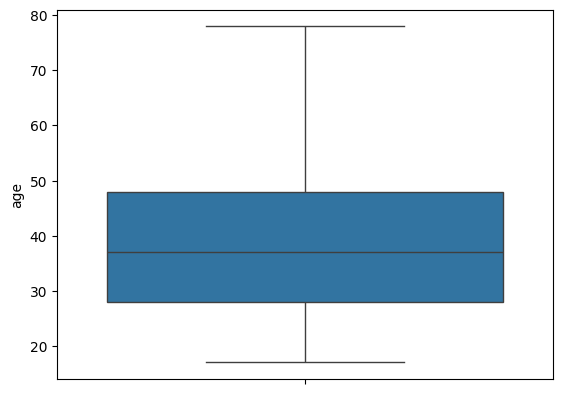

In [ ]:
sns.boxplot(data['age'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

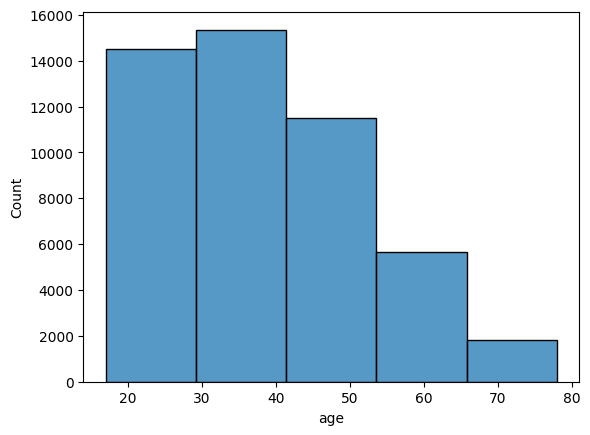

In [ ]:
sns.histplot(data['age'],bins=5)

<ipython-input-14-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

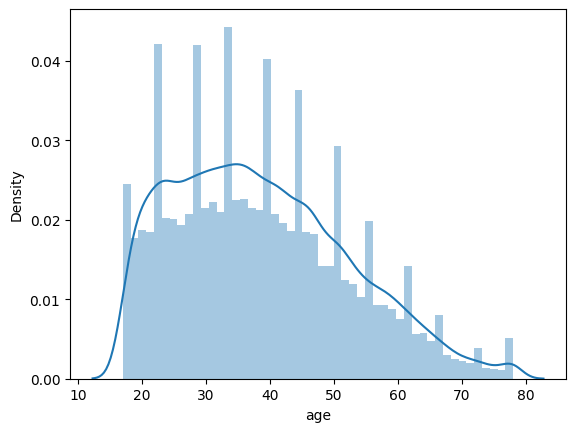

In [ ]:
sns.distplot(data['age'])

In [ ]:
col=['occupation','relationship']
for i in col:
  print(i ,"\n")
  print(data[i].value_counts())

occupation 

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3023
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
relationship 

relationship
Husband           19716
Not-in-family     12583
Own-child          7582
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='occupation'>

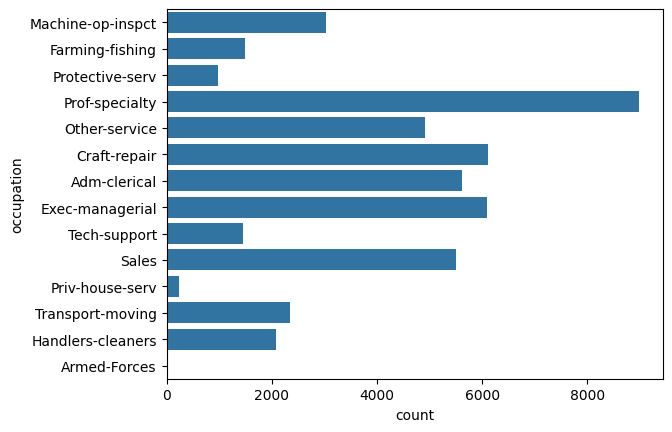

In [ ]:
sns.countplot(data['occupation'])

In [ ]:
# 1.cat-cat
# 2.cat-cont
# 3.cont-cont

<Axes: xlabel='gender', ylabel='age'>

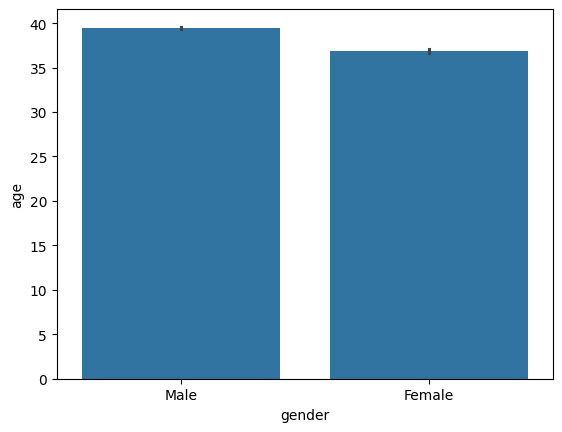

In [ ]:
sns.barplot(x=data['gender'],y=data['age'])

<Axes: xlabel='gender', ylabel='age'>

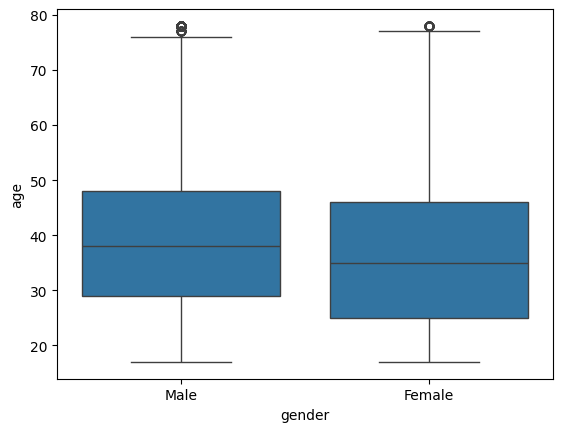

In [ ]:
sns.boxplot(x=data['gender'],y=data['age'])

<Axes: xlabel='income', ylabel='count'>

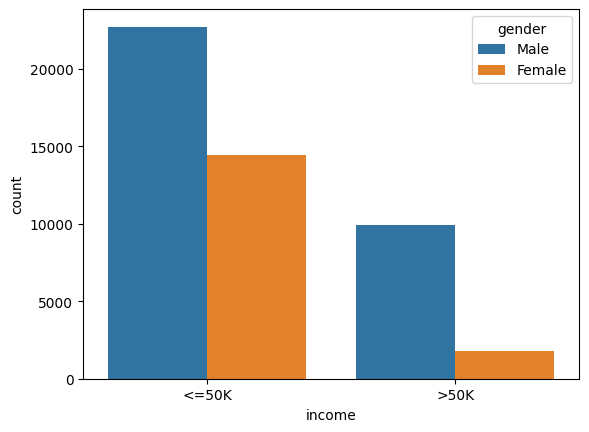

In [ ]:
sns.countplot(x=data['income'],hue=data['gender'])

<Axes: xlabel='age', ylabel='capital_gain'>

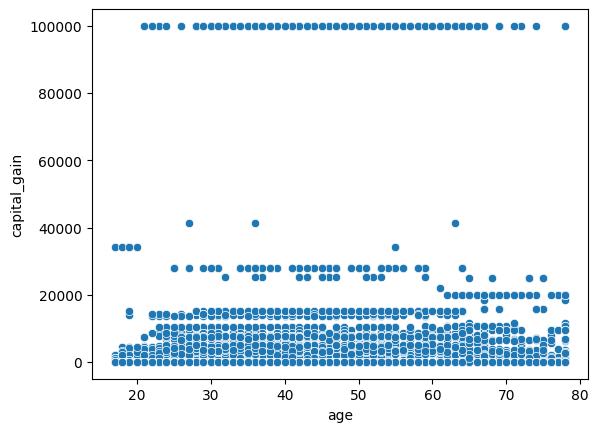

In [ ]:
sns.scatterplot(x=data['age'],y=data['capital_gain'])

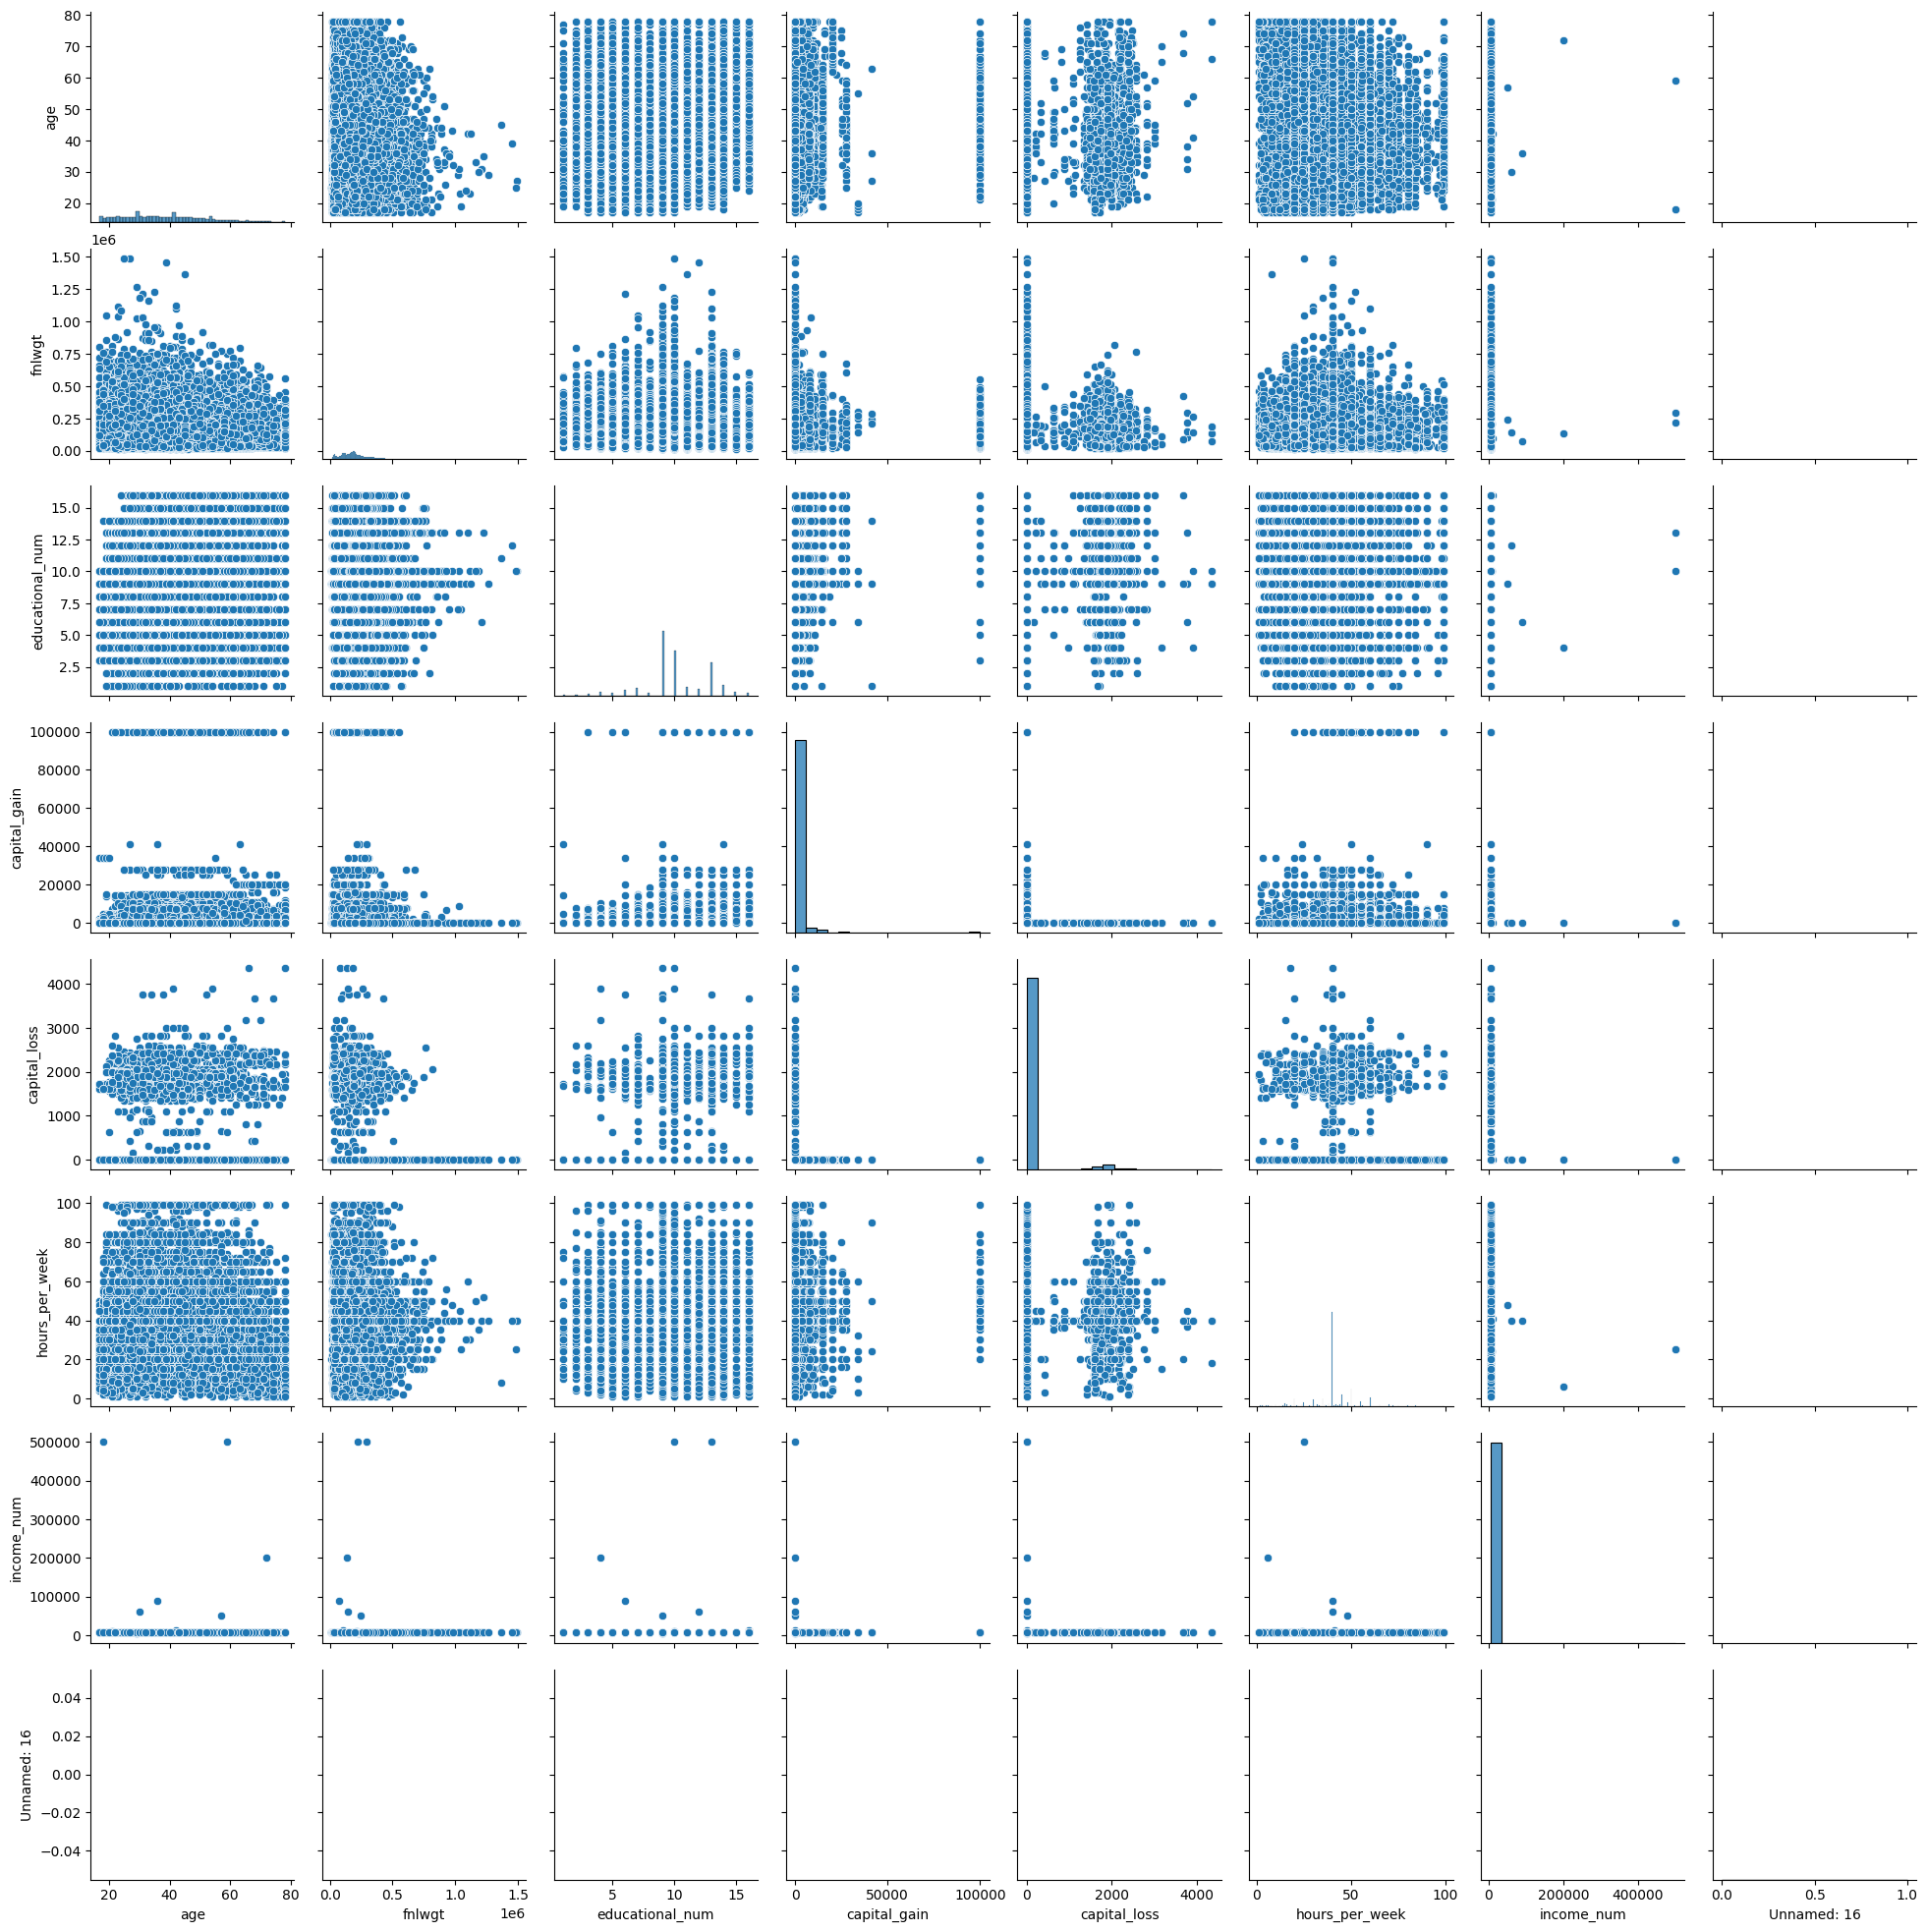

In [ ]:
sns.pairplot(data)

In [ ]:
corr1=data[['age','capital_gain','capital_loss','income_num']].corr()

<Axes: >

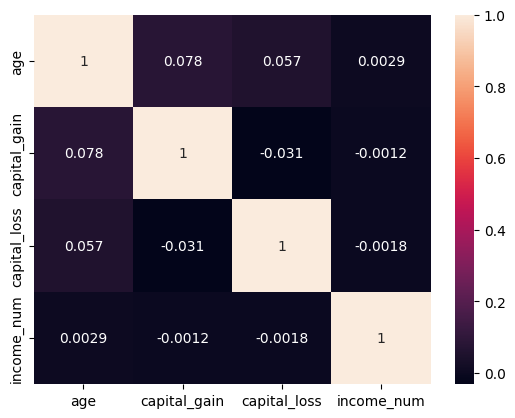

In [ ]:
sns.heatmap(corr1,annot=True)